In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR 
import sklearn.feature_selection 

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [12]:
df = pd.read_csv('../data/datos_procesados.csv')


In [13]:
df

,Año,Nº puertas,Potencia,Velocidad máxima,Aceleracion,Consumo,Emisiones,Largo,Ancho,Alto,...,Carroceria_Monovolumen,Carroceria_Pick Up,Carroceria_Todoterreno,Carroceria_Turismo,Carroceria_Turismo familiar,Carroceria_Vehículo comercial,Etiqueta_C,Etiqueta_Cero,Etiqueta_ECO,Etiqueta_Sin etiqueta
0,2019.0,5.0,150.0,212.0,8.7,4.5,117.0,4548.0,1816.0,1439.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2009.0,3.0,110.0,190.0,10.7,4.5,119.0,4199.0,1779.0,1469.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007.0,5.0,177.0,200.0,9.3,7.0,185.0,4395.0,1815.0,1720.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011.0,5.0,143.0,190.0,11.4,6.5,172.0,4629.0,1880.0,1653.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013.0,5.0,313.0,250.0,5.3,6.4,169.0,4969.0,1911.0,1420.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,2010.0,3.0,78.0,165.0,12.3,5.9,138.0,4063.0,1721.0,1446.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52058,2019.0,5.0,150.0,200.0,9.4,5.4,139.0,4486.0,1839.0,1673.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52059,2020.0,5.0,95.0,185.0,11.2,3.7,97.0,4053.0,1751.0,1461.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
52060,2019.0,5.0,125.0,200.0,10.0,4.9,107.0,4378.0,1825.0,1471.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
df.dtypes

Año                              float64
Nº puertas                       float64
Potencia                         float64
Velocidad máxima                 float64
Aceleracion                      float64
Consumo                          float64
Emisiones                        float64
Largo                            float64
Ancho                            float64
Alto                             float64
KM_log                           float64
Precio_log                       float64
C_Eléctrico                      float64
C_Gasolina                       float64
C_Híbrido                        float64
C_Otros                          float64
Ca_Manual                        float64
Ca_Otro                          float64
Color_Azul                       float64
Color_Beige                      float64
Color_Blanco                     float64
Color_Gris                       float64
Color_Marron                     float64
Color_Naranja                    float64
Color_Negro     

In [17]:
# Declarar la característica y la variable de destino
X = df.drop('Precio_log', axis=1)
y = df['Precio_log']

X.shape, y.shape

((52062, 40), (52062,))

In [18]:
# Creo instancia de datos
scaler = StandardScaler()

# Escalo datos
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-0.14605402,  0.35881465,  0.1501827 , ..., -0.29837306,
        -0.26883366, -0.13611338],
       [-2.96379592, -2.94846333, -0.47886166, ..., -0.29837306,
        -0.26883366, -0.13611338],
       [-3.52734431,  0.35881465,  0.57478764, ..., -0.29837306,
        -0.26883366, -0.13611338],
       ...,
       [ 0.13572017,  0.35881465, -0.71475329, ..., -0.29837306,
        -0.26883366, -0.13611338],
       [-0.14605402,  0.35881465, -0.24297002, ..., -0.29837306,
        -0.26883366, -0.13611338],
       [-0.14605402,  0.35881465, -0.32160057, ..., -0.29837306,
        -0.26883366, -0.13611338]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=48)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((36443, 40), (36443,), (15619, 40), (15619,))

In [20]:
# Creo instancia de modelo
reg = LinearRegression()

# Ajuste de datos
model = reg.fit(X_train, y_train)

In [21]:
model.score

<bound method RegressorMixin.score of LinearRegression()>

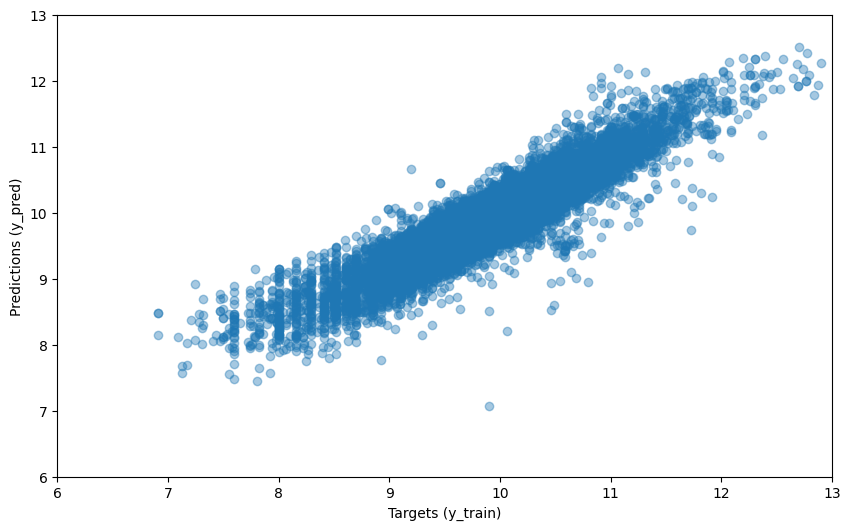

In [22]:
# Linear regression model
# check predict con originales
y_pred_train = reg.predict(X_train)
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred_train, alpha=0.4);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.xlim(6,13);
plt.ylim(6,13);

La predicción del entrenamiento se ve bien, no es completamente aleatoria, puedo observar la linealidad en el gráfico.
Otra forma de comprobar el "Residual", que es la diferencia entre los objetivos y las predicciones.

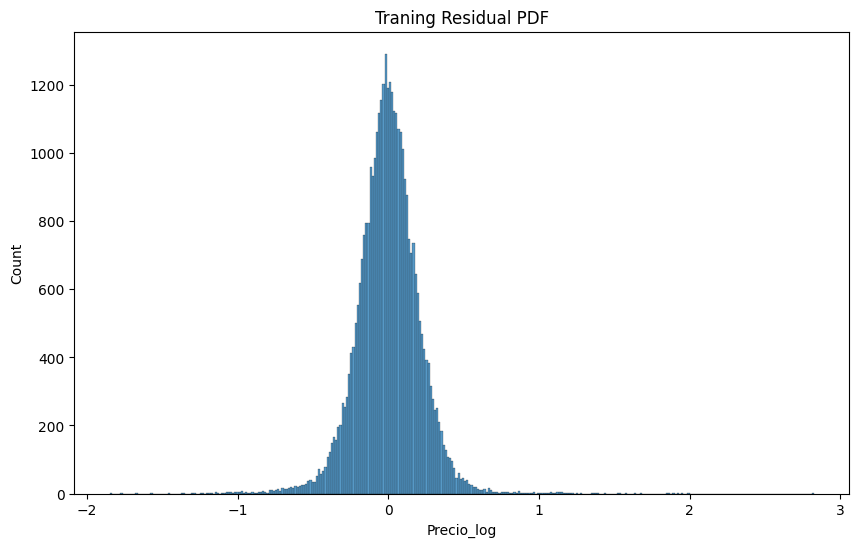

In [23]:
# plotting distribucion del residual
residual_train = (y_train - y_pred_train)

plt.figure(figsize=(10,6))
sns.histplot(residual_train);
plt.title('Traning Residual PDF');

En este gráfico puedo observar que la mayor parte del valor se encuentra cerca de "0", ya que la media es "0", quiero decir que el modelo funciona mejor, ya que la mayor parte de la diferencia es "0", el modelo hace el predicción tal como está en el valor objetivo.

In [24]:
# Check r2_score

r2_score(y_train, y_pred_train)

0.843239520987725

In [25]:
# Check rmse

np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

8597.617752966024

El precio mínimo y máximo era 
Precio máximo: 499900
Precio mínimo: 999 
en el conjunto de datos y nuestro modelo comete el error "23918".


Nuestro modelo define el 81% de la variabilidad de los datos.

In [26]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Año,0.295663
1,Nº puertas,-0.029363
2,Potencia,0.154907
3,Velocidad máxima,0.086812
4,Aceleracion,-0.009239
5,Consumo,0.012366
6,Emisiones,0.050818
7,Largo,0.049910
8,Ancho,0.017722
9,Alto,0.051629


weights positivo = aumento de característica, aumentara el precio.

weights negativo = aumento de característica, el precio disminuirá.

Ahora evaluo en test data

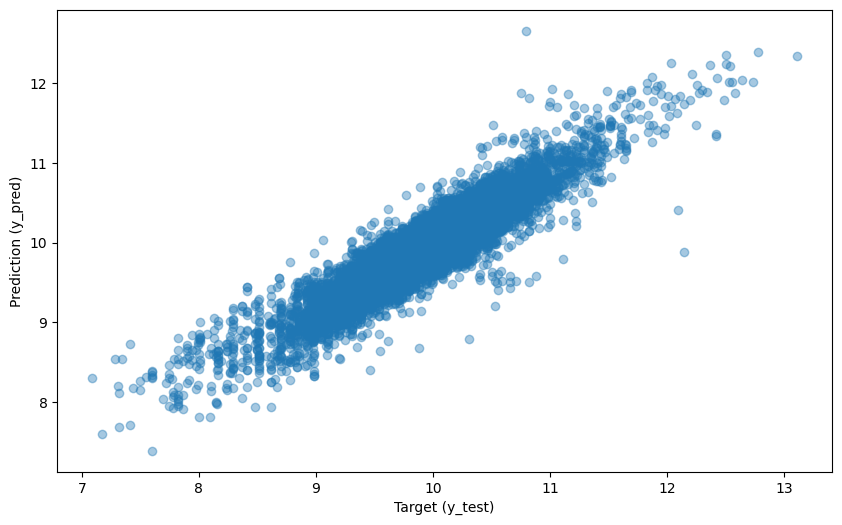

In [27]:
# predict en data

y_pred = reg.predict(X_test)

# grafico
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.4);

plt.xlabel('Target (y_test)');
plt.ylabel('Prediction (y_pred)');

In [28]:
# rmse en test data
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

7948.15311498845

Es una cifra alta de diferencia de precio. Quizas mejorable

In [29]:
# Crear dataframe para comparar resultado y predict.
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediccion']) # np.exp invertirá la transformación log_tranformation 
# add columna
y_test = y_test.reset_index(drop=True)
df_eval['Objetivo'] = np.exp(y_test)

# check
df_eval

,Prediccion,Objetivo
0,15408.135552,13491.0
1,18351.296661,19600.0
2,14778.424398,13491.0
3,28615.005171,26251.0
4,27878.963729,25901.0
...,...,...
15614,36875.317367,29991.0
15615,15739.539208,17901.0
15616,22750.264633,34501.0
15617,16120.792062,14491.0


In [30]:
df_eval['Residual'] = df_eval['Objetivo'] - df_eval['Prediccion']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Objetivo']*100)

# check rendimiento
df_eval

,Prediccion,Objetivo,Residual,Difference%
0,15408.135552,13491.0,-1917.135552,14.210478
1,18351.296661,19600.0,1248.703339,6.370935
2,14778.424398,13491.0,-1287.424398,9.542839
3,28615.005171,26251.0,-2364.005171,9.005391
4,27878.963729,25901.0,-1977.963729,7.636631
...,...,...,...,...
15614,36875.317367,29991.0,-6884.317367,22.954611
15615,15739.539208,17901.0,2161.460792,12.074525
15616,22750.264633,34501.0,11750.735367,34.059115
15617,16120.792062,14491.0,-1629.792062,11.246926


In [31]:
df_eval.describe()

,Prediccion,Objetivo,Residual,Difference%
count,15619.000000,15619.000000,15619.000000,15619.000000
mean,22974.437847,23480.818938,506.381091,15.536211
std,13967.006826,16792.242846,7932.259741,16.383686
min,1629.042173,1200.000000,-264286.380588,0.000328
25%,15332.884649,14991.000000,-2208.686446,5.405147
50%,20200.226915,19991.000000,-42.774235,11.683681
75%,27131.799350,27601.000000,2362.915623,20.809930
max,312977.380588,495001.000000,265971.869880,542.782815


In [32]:
# obteniendo valores

# configurando todos los valores dos digitos despues del punto
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

,Prediccion,Objetivo,Residual,Difference%
12163,20600.07,20600.00,-0.07,0.00
15216,42990.75,42991.00,0.25,0.00
871,21600.11,21601.00,0.89,0.00
15162,12700.33,12701.00,0.67,0.01
6041,18852.08,18851.00,-1.08,0.01
...,...,...,...,...
11379,5110.10,1551.00,-3559.10,229.47
3026,4046.76,1200.00,-2846.76,237.23
8829,5143.59,1451.00,-3692.59,254.49
1542,6172.09,1651.00,-4521.09,273.84


***********************************************************************************

RANDOM FOREST
****************************************************

In [33]:

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy en Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy en Testing set: ",rf_reg.score(X_test,y_test))

Accuracy en Traing set:  0.9905757917871609
Accuracy en Testing set:  0.9329978448400744


In [34]:

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.09058796340679257
Mean Squared  Error      :  0.018474431245957587
Root Mean Squared  Error :  0.1359206799790142
R Squared Error          :  0.9329978448400744


In [35]:
columnas_numericas=df.select_dtypes(exclude=['object']).columns

In [36]:
columnas_numericas

Index(['Año', 'Nº puertas', 'Potencia', 'Velocidad máxima', 'Aceleracion',
       'Consumo', 'Emisiones', 'Largo', 'Ancho', 'Alto', 'KM_log',
       'Precio_log', 'C_Eléctrico', 'C_Gasolina', 'C_Híbrido', 'C_Otros',
       'Ca_Manual', 'Ca_Otro', 'Color_Azul', 'Color_Beige', 'Color_Blanco',
       'Color_Gris', 'Color_Marron', 'Color_Naranja', 'Color_Negro',
       'Color_Otro', 'Color_Rojo', 'Color_Verde', 'Color_Violeta',
       'Marca_encoded', 'Carroceria_Descapotable', 'Carroceria_Monovolumen',
       'Carroceria_Pick Up', 'Carroceria_Todoterreno', 'Carroceria_Turismo',
       'Carroceria_Turismo familiar', 'Carroceria_Vehículo comercial',
       'Etiqueta_C', 'Etiqueta_Cero', 'Etiqueta_ECO', 'Etiqueta_Sin etiqueta'],
      dtype='object')

In [38]:
X=df[columnas_numericas].drop('Precio_log',axis=1)
y=df['Precio_log']

In [40]:
X = df[columnas_numericas]
X=X.drop(['Precio_log'],axis=1)
y=df['Precio_log']

In [41]:
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X, y)
print('Las 5 mejores caracteristicas por rfe:',X.columns[rfe.support_])

Las 5 mejores caracteristicas por rfe: Index(['Año', 'Potencia', 'Ancho', 'KM_log', 'Ca_Manual'], dtype='object')


In [42]:
features=list(X.columns[rfe.support_])

In [43]:
features

['Año', 'Potencia', 'Ancho', 'KM_log', 'Ca_Manual']

In [44]:
x = X[features]
y = df.Precio
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

AttributeError: 'DataFrame' object has no attribute 'Precio'

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.829633853500366

In [ ]:
Rf = RandomForestRegressor(n_estimators = 5,
                              criterion = 'absolute_error',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.8751347407515958

Características Importantes:
feature 0: 0.177
feature 1: 0.221
feature 2: 0.173
feature 3: 0.238
feature 4: 0.191



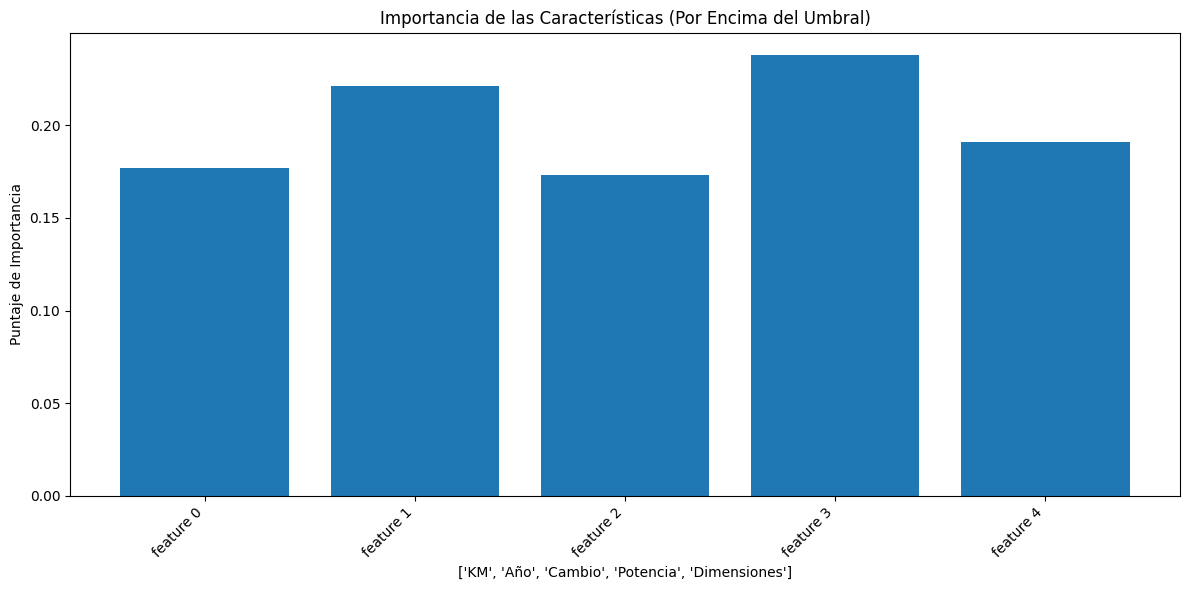

In [ ]:
importances = Rf.feature_importances_
i = ['KM', 'Año', 'Cambio', 'Potencia', 'Dimensiones']
features = [f'feature {i}' for i in range(X.shape[1])]

# Umbral para seleccionar características importantes (ajustar según sea necesario)
threshold = 0.001

# Filtrar características con importancia por encima del umbral
important_features = [features[i] for i, imp in enumerate(importances) if imp > threshold]
important_scores = [round(imp, 3) for imp in importances if imp > threshold]

# Imprimir características y puntajes importantes
print("Características Importantes:")
for feature, score in zip(important_features, important_scores):
    print(f"{feature}: {score}")

print()

# Gráfica mejorada (personaliza etiquetas y título si lo deseas)
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura
plt.bar(important_features, important_scores)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor lectura
plt.xlabel(f"{i}")
plt.ylabel("Puntaje de Importancia")
plt.title("Importancia de las Características (Por Encima del Umbral)")  # Título opcional
plt.tight_layout()
plt.show()